In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
test = pd.read_csv("/Google_Stock_Price_Test.csv")
train = pd.read_csv("/Google_Stock_Price_Train.csv")

In [ ]:
train_set = train.iloc[:, 1:2].values
test_set = test.iloc[:, 1:2].values

scale = MinMaxScaler(feature_range=(0, 1))
train_scaled = scale.fit_transform(train_set)


In [ ]:
def create_dataset(data, time_steps):
  x,y = [],[]
  for i in range(time_step, len(data)):
    x.append(data[i-time_step:i, 0])
    y.append(data[i, 0])
  return np.array(x), np.array(y)

time_step = 60
x_tr, y_tr = create_dataset(train_scaled, time_step)
x_tr = np.reshape(x_tr, (x_tr.shape[0], x_tr.shape[1], 1))



In [ ]:

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_tr.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_tr, y_tr, batch_size=32, epochs=50)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.1409
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0072
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0051
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0039
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0041
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0043
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0039
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0034
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0037
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0037
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0032
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0039
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0033
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0032
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0033
Epoc

In [ ]:
total  = pd.concat((train['Open'], test['Open']), axis=0)
test_input = total[len(total) - len(test) - time_step:].values
test_input = test_input.reshape(-1,1)
test_input = scale.transform(test_input)

x_test = []
for i in range(time_step, len(test_input)):
  x_test.append(test_input[i-time_step:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred_price = model.predict(x_test)
pred_price = scale.inverse_transform(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


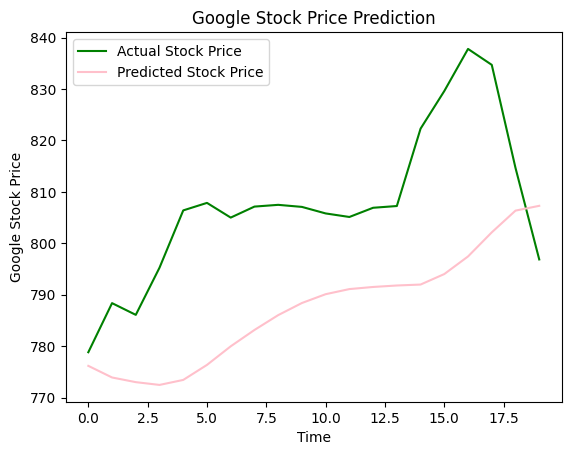

In [ ]:
plt.plot(test_set, color='green', label='Actual Stock Price')
plt.plot(pred_price, color='pink', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
root_mean_squared_error = np.sqrt(mean_squared_error(test_set, pred_price))
mean_absolute_error = mean_absolute_error(test_set, pred_price)
print(f"Root Mean Squared Error on test set : {root_mean_squared_error}")
print(f" Mean Absolute Error on test set : {mean_absolute_error}")
#

Root Mean Squared Error on test set : 23.42744186970322
 Mean Absolute Error on test set : 21.24506591796874
